## KNN Approach



### Setup

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-05-06 21:51:45.465767: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 21:51:45.573482: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 21:51:45.573522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 21:51:45.575937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 21:51:45.601320: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# read dynamic path
base_dir = Path(os.getcwd()) / "implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [4]:
nn_data_raw = pd.read_csv(data_dir/"SEH/SEH.csv")

nn_data_raw

,INDEX,NAME,Hydrophobic_Interaction:PHE387A,Hydrogen_Bond:TYR466A,Hydrogen_Bond:TRP336A,Salt_Bridge:HIS524A,Hydrophobic_Interaction:ASN472A,Hydrogen_Bond:ASN472A,Water_Bridge:ALA365A,Pi-Cation_Interaction:HIS524A,...,Water_Bridge:PHE267A,Hydrophobic_Interaction:PRO371A,Hydrophobic_Interaction:LEU428A,Hydrophobic_Interaction:ALA365A,Hydrogen_Bond:LEU408A,Hydrogen_Bond:TYR383A,Hydrogen_Bond:TYR343A,Hydrophobic_Interaction:HIS524A,Halogen_Bond:ASN472A,LABEL
0,1,IA_147.cdx|SeH_inactivess_minimized|sdf|48,1,1,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,inactive
1,2,IA_10|SeH_inactivess_minimized|sdf|1,0,1,0,1,0,0,0,0,...,2,0,0,0,0,2,0,0,0,inactive
2,3,A_103|SEH_inhibs_minimized|sdf|5,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
3,4,A_76|SEH_inhibs_minimized|sdf|46,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,active
4,5,IA_12|SeH_inactivess_minimized|sdf|22,0,1,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,IA_178.cdx|SeH_inactivess_minimized|sdf|79,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
194,195,IA_211.cdx|SeH_inactivess_minimized|sdf|109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
195,196,IA_155.cdx|SeH_inactivess_minimized|sdf|56,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
196,197,IA_163.cdx|SeH_inactivess_minimized|sdf|65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [5]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-05-06 21:51:52.717174: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:51:52.931129: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:51:52.931522: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:51:52.937748: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:51:52.938125: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150


2024-05-06 21:52:01.518706: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 21:52:03.900634: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f07f8467900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 21:52:03.900686: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-06 21:52:03.916938: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 21:52:04.035452: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715025124.431535   18134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 - 7s - loss: 0.7898 - accuracy: 0.4182 - val_loss: 0.8177 - val_accuracy: 0.3929 - 7s/epoch - 932ms/step
Epoch 2/150
7/7 - 0s - loss: 0.7763 - accuracy: 0.4182 - val_loss: 0.7971 - val_accuracy: 0.4286 - 396ms/epoch - 57ms/step
Epoch 3/150
7/7 - 0s - loss: 0.7636 - accuracy: 0.4455 - val_loss: 0.7774 - val_accuracy: 0.4643 - 362ms/epoch - 52ms/step
Epoch 4/150
7/7 - 0s - loss: 0.7502 - accuracy: 0.4818 - val_loss: 0.7615 - val_accuracy: 0.4643 - 368ms/epoch - 53ms/step
Epoch 5/150
7/7 - 0s - loss: 0.7401 - accuracy: 0.5000 - val_loss: 0.7449 - val_accuracy: 0.4643 - 349ms/epoch - 50ms/step
Epoch 6/150
7/7 - 0s - loss: 0.7293 - accuracy: 0.5091 - val_loss: 0.7300 - val_accuracy: 0.4643 - 355ms/epoch - 51ms/step
Epoch 7/150
7/7 - 0s - loss: 0.7196 - accuracy: 0.5364 - val_loss: 0.7164 - val_accuracy: 0.4643 - 332ms/epoch - 47ms/step
Epoch 8/150
7/7 - 0s - loss: 0.7113 - accuracy: 0.5364 - val_loss: 0.7035 - val_accuracy: 0.4643 - 350ms/epoch - 50ms/step
Epoch 9/150
7/7 - 0s - loss: 0

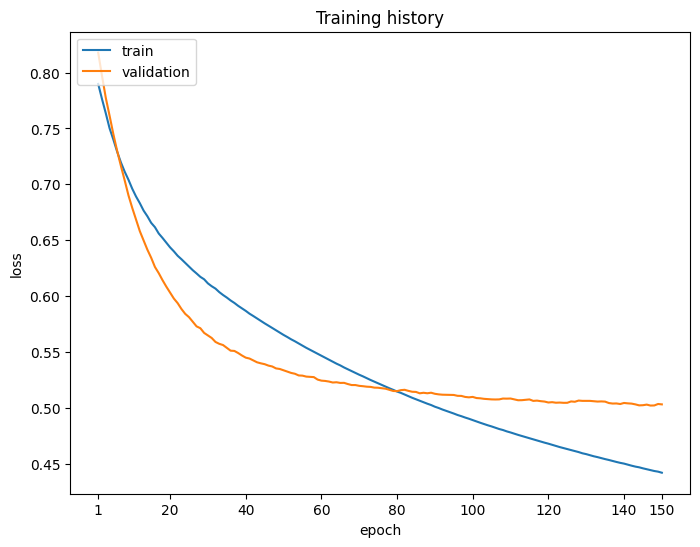

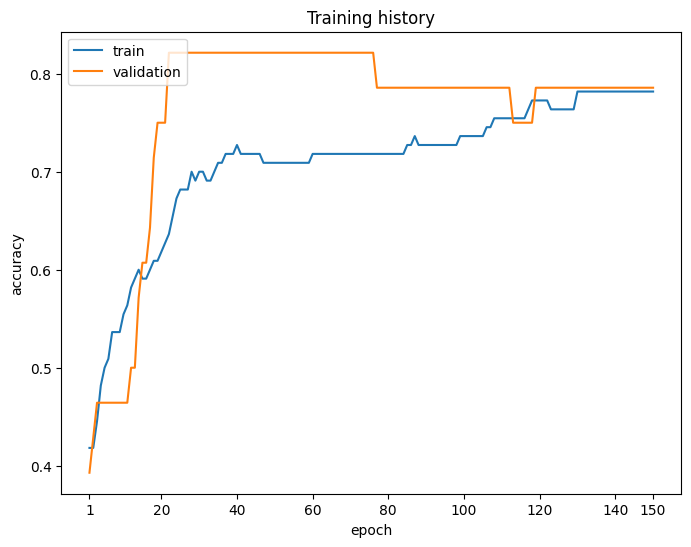

In [8]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [9]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


2/2 [==============================] - 0s 5ms/step


### Prepare Data for evaluation

In [10]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i]
    data.extend(row)
    result_df.loc[len(result_df["INDEX"])] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "SEH/baseline_nn.csv", encoding="utf-8")